# CNN Model for Text Image Classification
 

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Defining CNN Model

def cnn_model():
    model = Sequential()

    # Convolution Layer 1
    model.add(Conv2D(32,(3,3), activation='relu', input_shape = (64,64,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D( (2,2)))
    model.add(Dropout(0.25))

    #convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(12, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [4]:
model = cnn_model()
model.summary()

c:\Users\mohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         6,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,462,156 (9.39 MB)

 Trainable params: 2,460,684 (9.39 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [5]:
# Set up data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Load data
# using sparse for multi-class labels
train_generator = train_datagen.flow_from_directory(
    r'D:\Deep Learning\Text_Image_Language_Classifier\Text Image Dataset\train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    r'D:\Deep Learning\Text_Image_Language_Classifier\Text Image Dataset\test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse'
)

Found 12920 images belonging to 12 classes.
Found 3452 images belonging to 12 classes.


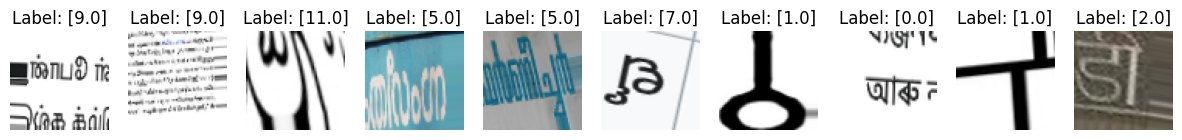

In [13]:
# Function to plot some images from the dataset
def plot_samples(generator, num_samples=10):
    x_batch, y_batch = next(generator)  # Get a batch of images and labels
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x_batch[i],cmap='gray')
        plt.title(f"Label: [{y_batch[i]}]")
        plt.axis('off')
    plt.show()

# Plot some samples from the training set
plot_samples(train_generator)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    epochs=30
)

Epoch 1/30


c:\Users\mohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


403/403 ━━━━━━━━━━━━━━━━━━━━ 156s 373ms/step - accuracy: 0.5263 - loss: 1.6687 - val_accuracy: 0.1688 - val_loss: 2.8540
Epoch 2/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.6562 - loss: 0.4709 - val_accuracy: 0.1429 - val_loss: 1.4536
Epoch 3/30


c:\Users\mohan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


403/403 ━━━━━━━━━━━━━━━━━━━━ 155s 381ms/step - accuracy: 0.6743 - loss: 0.9588 - val_accuracy: 0.4661 - val_loss: 2.2138
Epoch 4/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - accuracy: 0.7812 - loss: 0.2744 - val_accuracy: 0.6786 - val_loss: 0.8074
Epoch 5/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 91s 224ms/step - accuracy: 0.7291 - loss: 0.7586 - val_accuracy: 0.4623 - val_loss: 2.1663
Epoch 6/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 0.8125 - loss: 0.2368 - val_accuracy: 0.3214 - val_loss: 1.1573
Epoch 7/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 74s 183ms/step - accuracy: 0.7714 - loss: 0.6440 - val_accuracy: 0.4907 - val_loss: 1.9462
Epoch 8/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - accuracy: 0.9062 - loss: 0.2052 - val_accuracy: 0.5357 - val_loss: 0.8641
Epoch 9/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 110s 272ms/step - accuracy: 0.7860 - loss: 0.5962 - val_accuracy: 0.5169 - val_loss: 2.4928
Epoch 10/30
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.8125 - loss: 0.2794 - val_a

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.2f}%')
print(f"Validation Accuracy: {accuracy*100:.2f}%")

108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5991 - loss: 1.7566
Validation Loss: 1.74%
Validation Accuracy: 60.05%


In [16]:
# Save the model
model.save('text_image_language_classifier.h5')

In [17]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score

In [22]:
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


print("Classification Report:")
print(classification_report(validation_generator,y_pred_classes))

108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step
Classification Report:


ValueError: Found input variables with inconsistent numbers of samples: [108, 3452]